<a href="https://colab.research.google.com/github/bc0403/ML2026/blob/main/lecture_02_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scikit-Learn APIs
- `fit`
- `predict`
- `score`
- `fit_transform`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from sklearn.linear_model import LinearRegression

# constants
HANDSON_ML2_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/"


### Example 1, regression

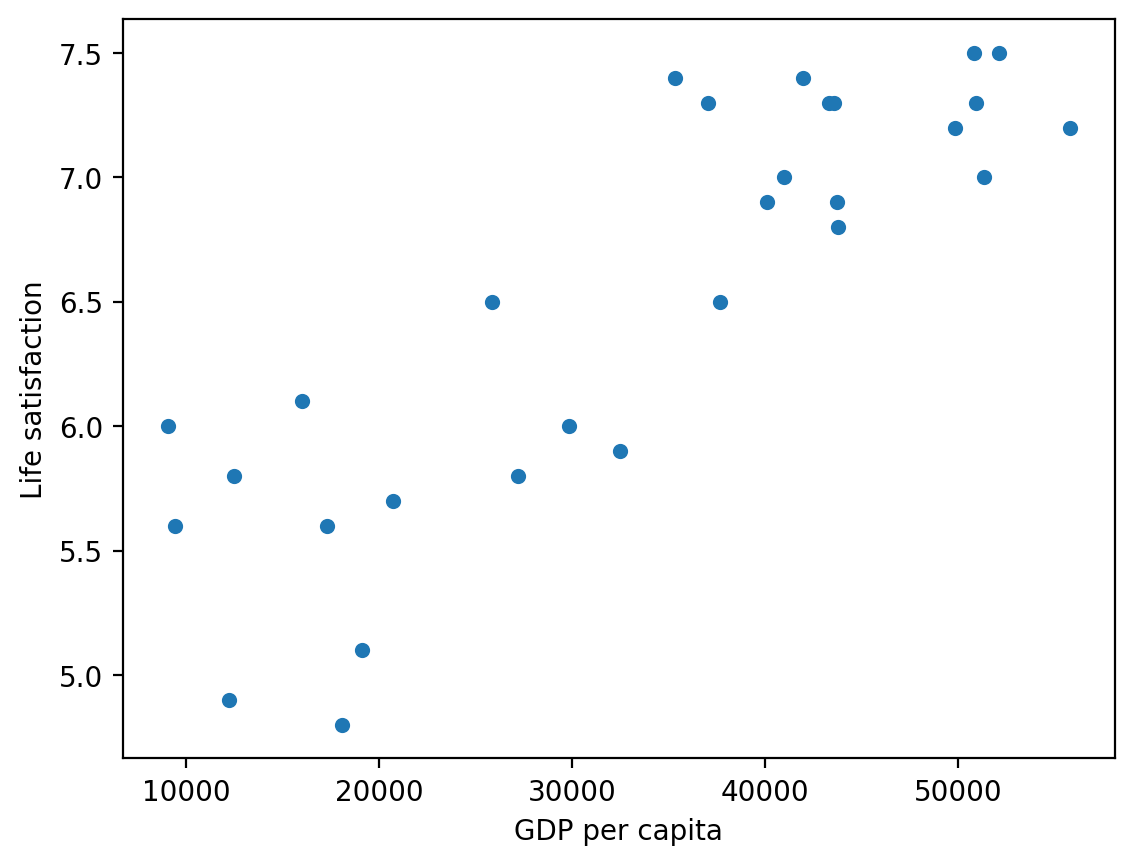

[[5.96242338]]
0.7344414355437031
[[4.91154459e-05]] [4.8530528]


In [2]:
# example 1

# This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Load the data
oecd_bli = pd.read_csv(HANDSON_ML2_ROOT + "lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(HANDSON_ML2_ROOT + "lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]
print(model.score(X, y))
print(model.coef_, model.intercept_)

### Example 2, regression

In [3]:
# example 2
data_path = "https://raw.githubusercontent.com/MachineLearningBiomedicalApplications/notebooks/refs/heads/main/Chapter%202%20-%20Starting%20with%20Scikit-learn/Notebooks/datasets/neonatal_brain_volumes.csv"
df = pd.read_csv(data_path)
df.head()

,GA,brain volume
0,35.714,252.41
1,37.429,277.73
2,36.143,266.36
3,36.714,266.13
4,42.286,308.35


<Axes: xlabel='GA', ylabel='brain volume'>

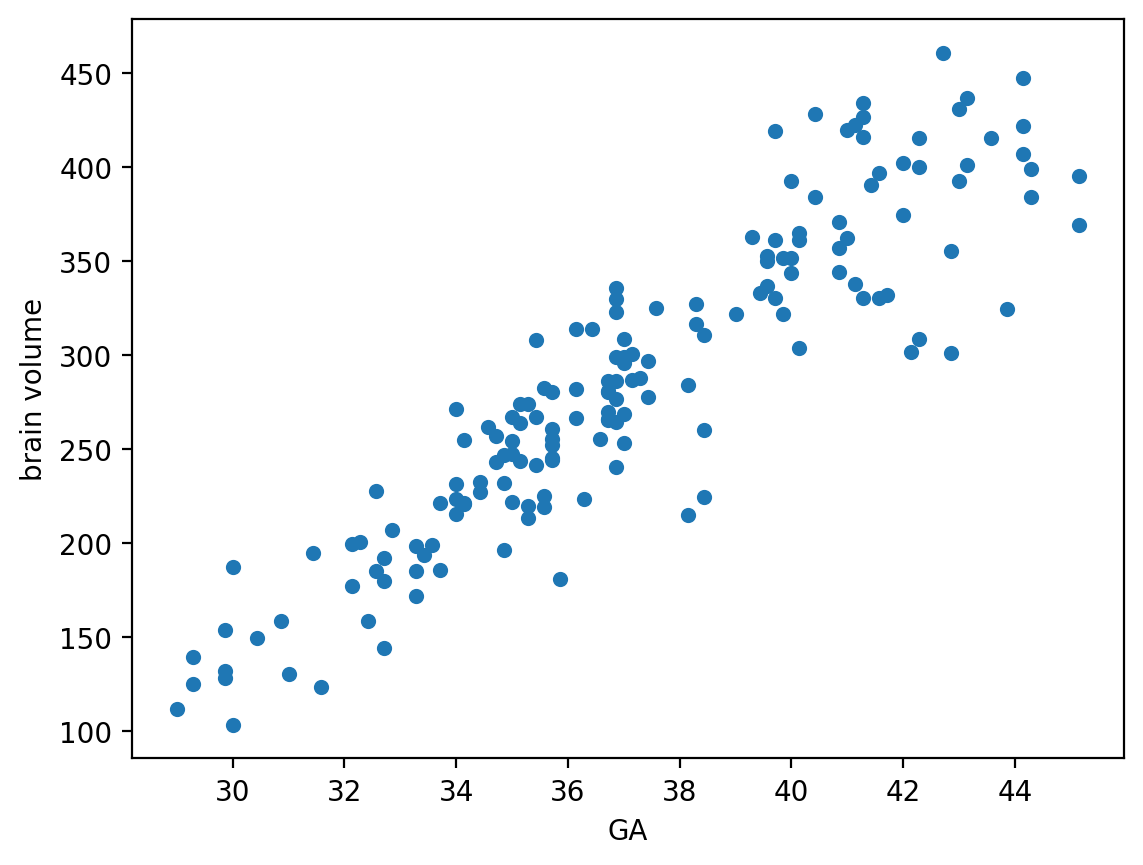

In [4]:
df.plot.scatter(x='GA', y='brain volume')

[[19.64732854]]
[-445.28912858]
0.8359982834757587


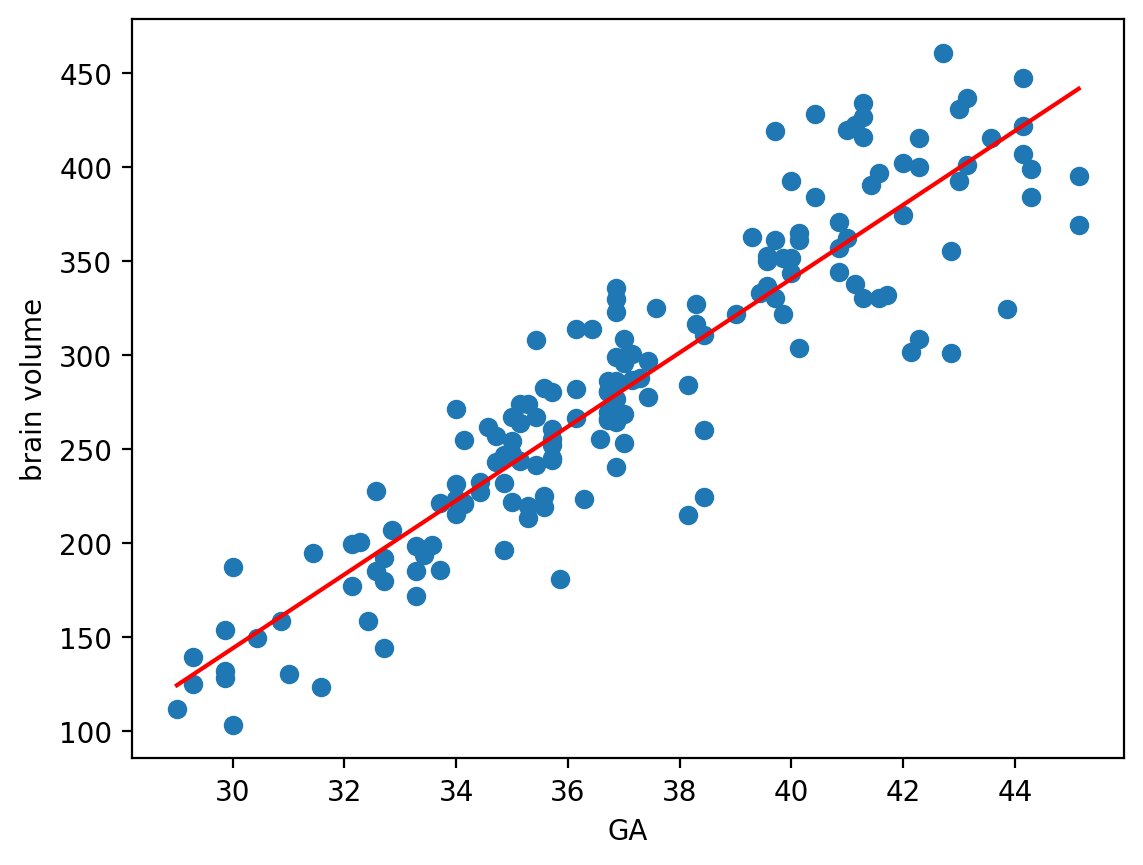

In [5]:
# convert df to numpy
data = df.to_numpy()

# prepare the data
X = data[:, 0].reshape(-1,1)
y = data[:, 1].reshape(-1,1)

# select a model
model = LinearRegression()

# train the model
model.fit(X, y)

print(model.coef_)
print(model.intercept_)
print(model.score(X, y))

# predict on new data
X_model = np.linspace(np.min(X), np.max(X), 10).reshape(-1,1)
y_model = model.predict(X_model)

# visualize data with model
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_model, y_model, color='red')
ax.set_xlabel('GA')
ax.set_ylabel('brain volume')
plt.show()

### Example 3, classification

In [6]:
# example 3
data_path = "https://raw.githubusercontent.com/MachineLearningBiomedicalApplications/notebooks/refs/heads/main/Chapter%202%20-%20Starting%20with%20Scikit-learn/Notebooks/datasets/heart_failure_data.csv"

# load the data
df = pd.read_csv(data_path)
df.head()

,EF,GLS,HF
0,50.922280,-19.57,0
1,54.601227,-19.00,0
2,50.000000,-21.00,0
3,50.819672,-18.74,0
4,53.191489,-19.78,0


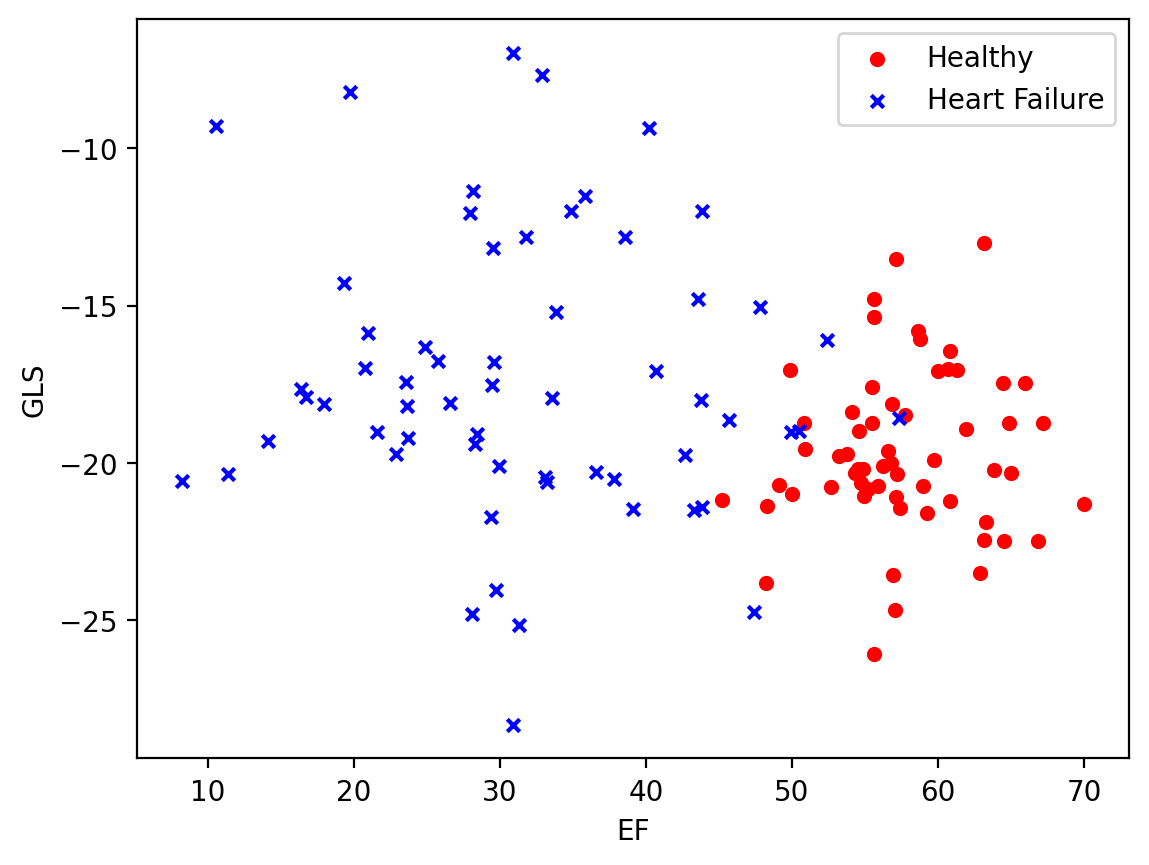

In [7]:
from matplotlib import color_sequences
# EDA
df0 = df[df['HF']==0]
df1 = df[df['HF']==1]

fig, ax = plt.subplots()
df0.plot.scatter(x='EF', y='GLS', color='red', label='Healthy', marker='o', ax=ax)
df1.plot.scatter(x='EF', y='GLS', color='blue', label='Heart Failure', marker='x', ax=ax)
ax.legend()

#

In [8]:
# prepare data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# convert to numpy
data = df.to_numpy()

X = scaler.fit_transform(data[:, :2])  # standardize the X
y = data[:, -1]

# select a model
from sklearn.linear_model import Perceptron
model = Perceptron()

# fit the model
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

print(model.score(X, y))

[[-4.18394231  0.10790064]]
[1.]
0.9583333333333334


1.0 -4.183942313915732 0.10790064191900745
0.172199289119681 0.3177230984684737
-2.590606532589284 3.052207196671432


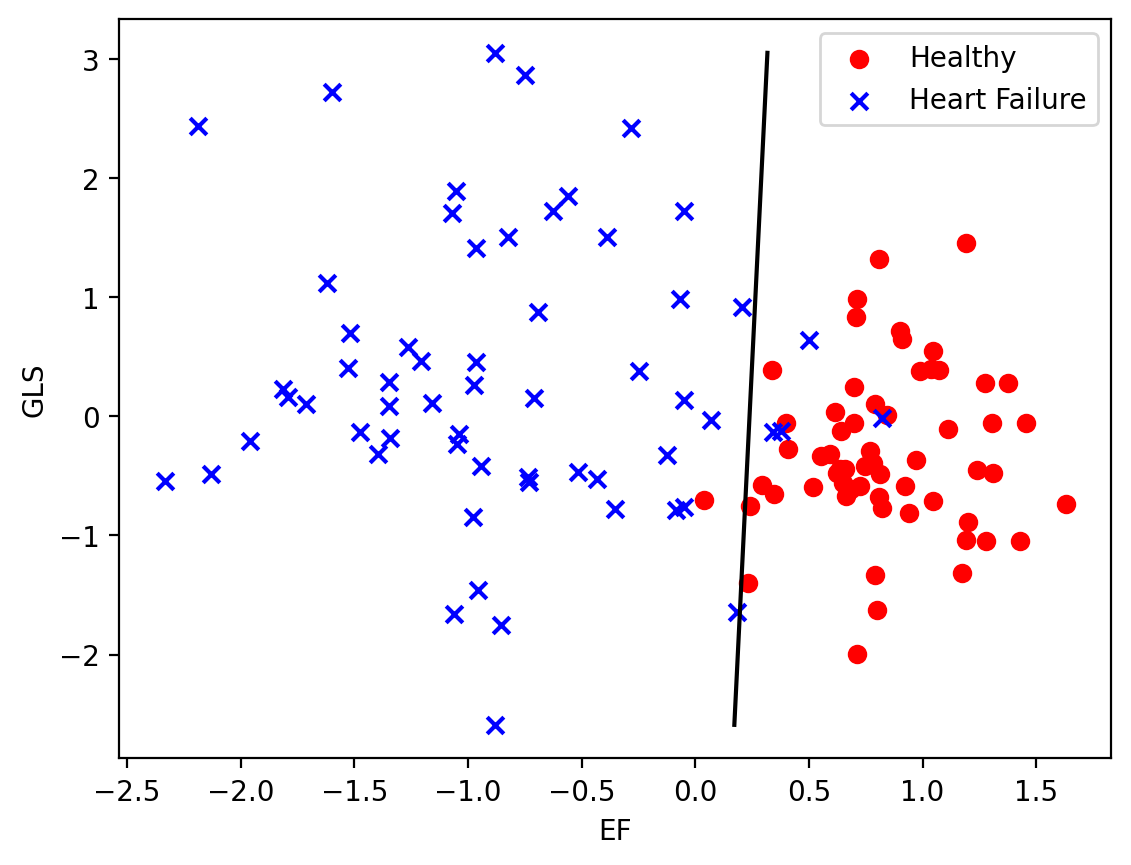

In [9]:
# visualize the data and model
w0 = model.intercept_[0]
w1 = model.coef_[0, 0]
w2 = model.coef_[0, 1]
print(w0, w1, w2)

# ===Sweep the feature that lets you divide by the larger-magnitude weight (avoid dividing by something tiny)===
# x2_model = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10).reshape(-1,1)
# x1_model = -(w0 + w2*x2_model)/w1

# # x1_model = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 10).reshape(-1,1)
# # x2_model = -(w0 + w1*x1_model)/w2

if abs(w2) >= abs(w1):
    # solve for x2, sweep x1
    x1_model = np.linspace(X[:,0].min(), X[:,0].max(), 10)
    x2_model = -(w0 + w1*x1_model)/w2
else:
    # solve for x1, sweep x2
    x2_model = np.linspace(X[:,1].min(), X[:,1].max(), 10)
    x1_model = -(w0 + w2*x2_model)/w1


print(x1_model.min(), x1_model.max())
print(x2_model.min(), x2_model.max())

fig, ax = plt.subplots()
ax.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Healthy', marker='o')
ax.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Heart Failure', marker='x')
ax.plot(x1_model, x2_model, color='black')
ax.set_xlabel('EF')
ax.set_ylabel('GLS')
ax.legend()

#

### Example 4, dimension reduction

In [10]:
# example 4
from sklearn import datasets

bc = datasets.load_breast_cancer()
print(bc)
print("")
print(type(bc))

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [11]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
bc['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
bc['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [14]:
# prepare the data
X=bc.data
print(X.shape)

(569, 30)


In [15]:
# select a model
from sklearn.decomposition import PCA
model = PCA(n_components=2)

# fit the model
model.fit(X)

# evaluate the model
print(model.explained_variance_ratio_)

# transform the features
X_reduced = model.transform(X)
print(X_reduced.shape)


[0.98204467 0.01617649]
(569, 2)


In [16]:
# explore why n=2
model2 = PCA(n_components=30)
model2.fit(X)
print(model2.explained_variance_ratio_)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908878e-08
 6.99641648e-09 4.78318305e-09 2.93549213e-09 1.41684926e-09
 8.29577731e-10 5.20405880e-10 4.08463983e-10 3.63313376e-10
 1.72849736e-10 1.27487508e-10 7.72682973e-11 6.28357715e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666944e-12 1.55344680e-12]


In [17]:
print(X_reduced)

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


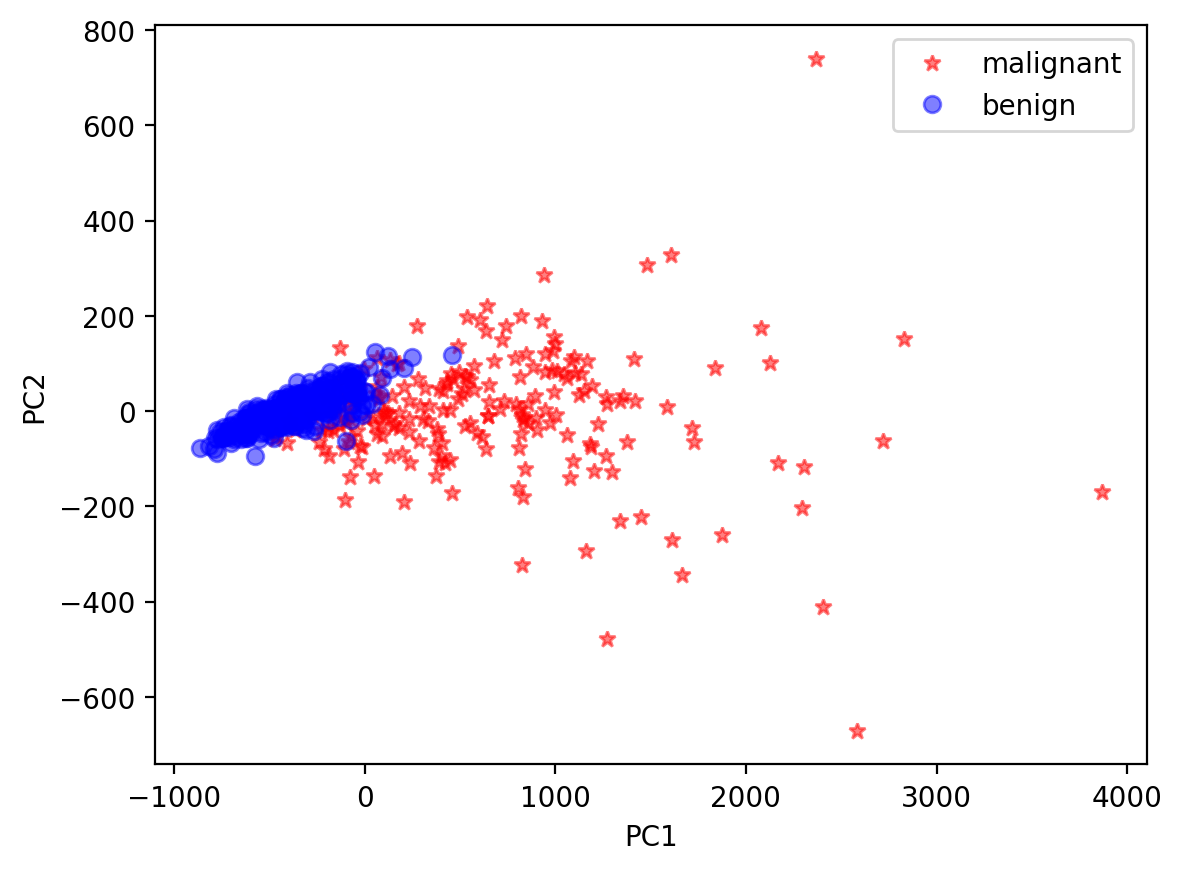

In [18]:
# visualize
labels = bc.target

fig, ax = plt.subplots()
ax.plot(X_reduced[labels==0, 0], X_reduced[labels==0, 1], "r*", alpha=0.5, label='malignant')
ax.plot(X_reduced[labels==1, 0], X_reduced[labels==1, 1], "bo", alpha=0.5, label='benign')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()

In [19]:
# Using standardization before PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

model = PCA(n_components=2)
model.fit(X_std)

print(model.explained_variance_ratio_)

X_reduced = model.transform(X_std)

[0.44272026 0.18971182]


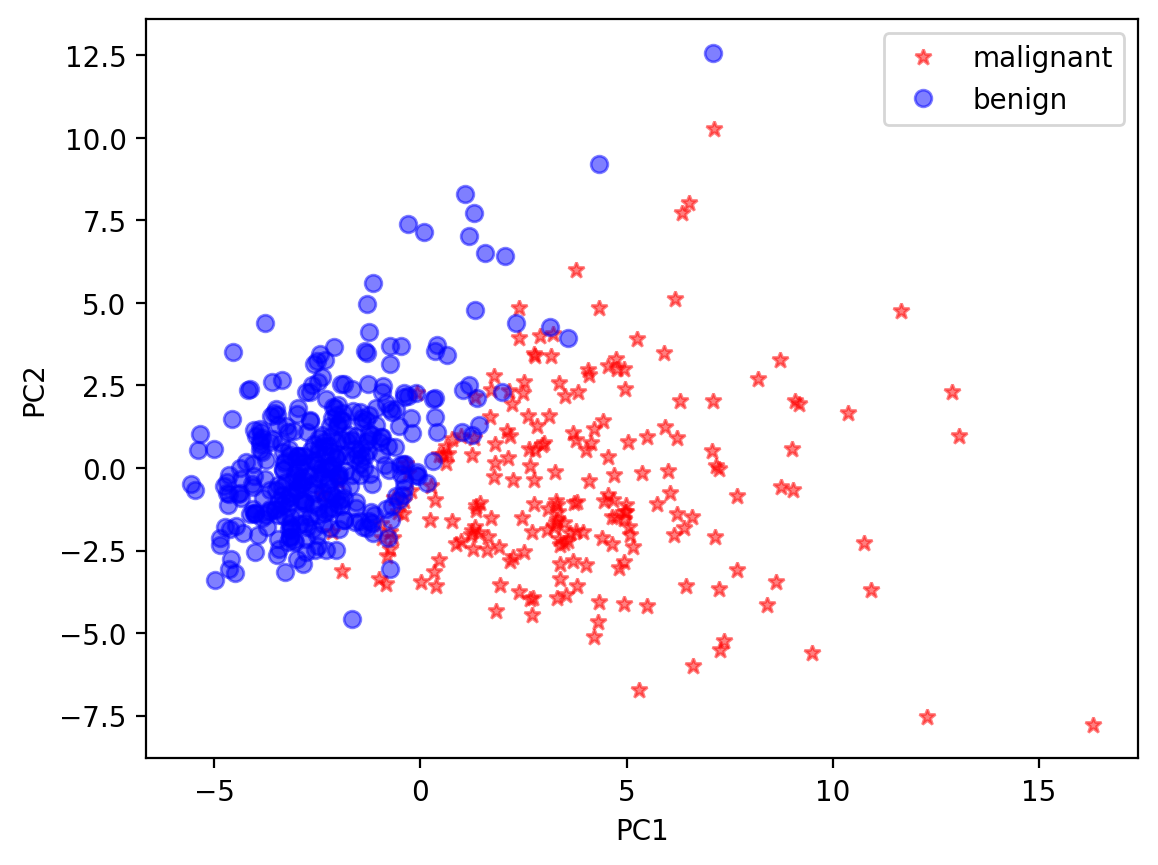

In [20]:
# visualize
labels = bc.target

fig, ax = plt.subplots()
ax.plot(X_reduced[labels==0, 0], X_reduced[labels==0, 1], "r*", alpha=0.5, label='malignant')
ax.plot(X_reduced[labels==1, 0], X_reduced[labels==1, 1], "bo", alpha=0.5, label='benign')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()

## workflow, dummy demo

### generate data

(100,) (100,)
(100, 1)


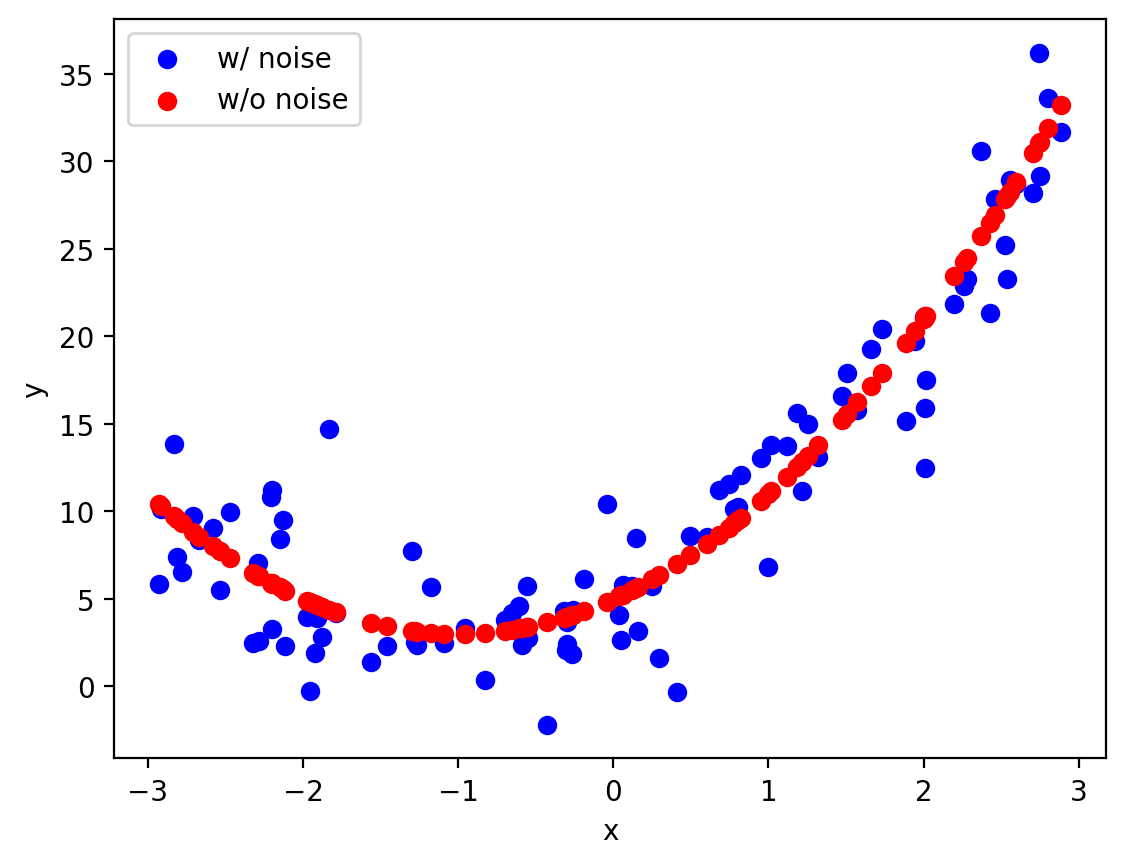

In [21]:
# define the true model
def TrueModel(x):
    return 2*x**2 + 4*x + 5

# generate random samples
np.random.seed(40)

n = 100
X = 6*np.random.random(n) - 3  # uniform distribution
noise = 3*np.random.normal(0, 1, n)   # normal distribution
y = TrueModel(X) + noise
y2 = TrueModel(X)

# visualize the data

print(X.shape, y.shape)

X = X.reshape(-1, 1)
print(X.shape)

# visualize the data
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='w/ noise')
ax.scatter(X, y2, color='red', label='w/o noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

### split dataset

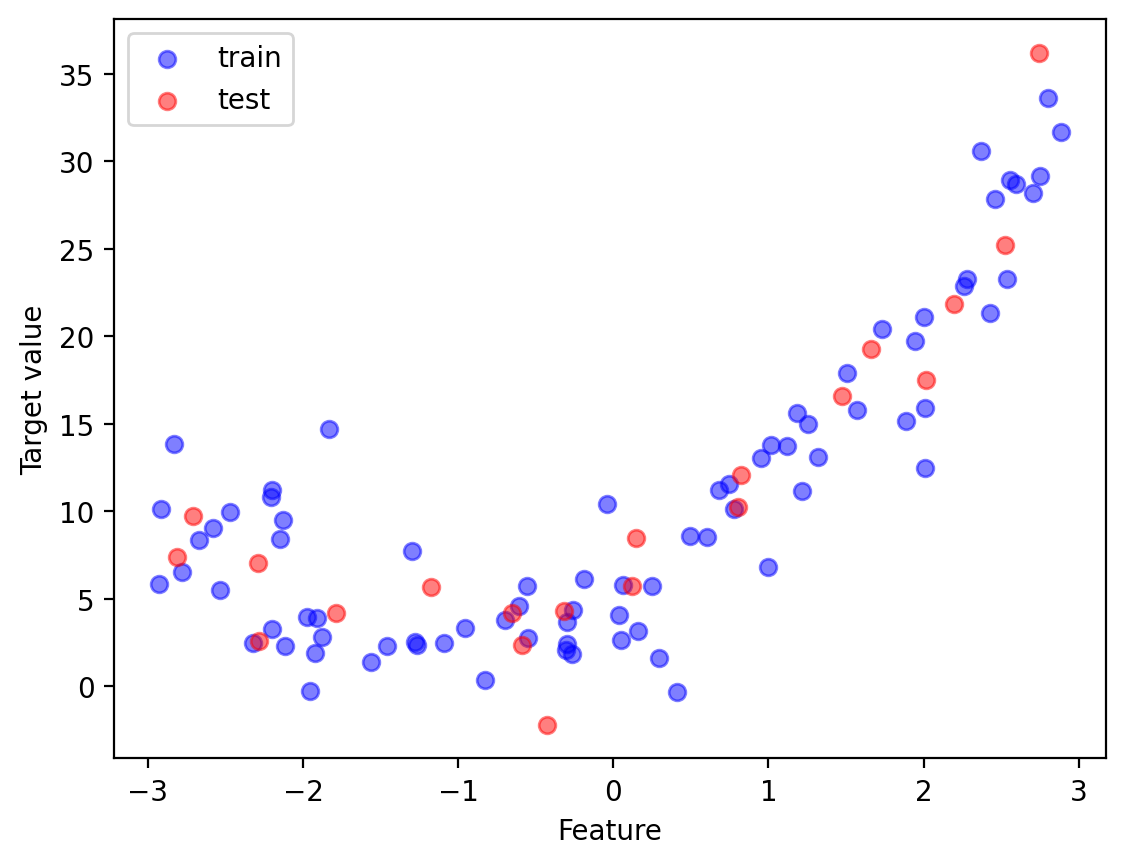

In [22]:
from sklearn.model_selection import train_test_split

# create bins for the target values
bins = np.round(X)  # create label sequence according to X

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, stratify=bins, random_state=42)

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='blue', alpha=0.5, label='train')
ax.scatter(X_test, y_test, color='red', alpha=0.5, label='test')
ax.legend()
ax.set_xlabel('Feature')
ax.set_ylabel('Target value')
plt.show()

### optimize models

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# define models
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression(fit_intercept=False)),
])

degrees = range(1, 5)

# define parameter dict
parameters = {"poly_features__degree": degrees}

# create grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')   # Grid search Max value, so, use negative
# grid_search = GridSearchCV(pipeline, parameters, cv=5)
# fit
grid_search.fit(X_train, y_train)

# get the best model
best_model = grid_search.best_estimator_

print(best_model.named_steps['poly_features'].degree)
print(grid_search.best_score_)

print(grid_search.cv_results_)

2
-10.23921797960465
{'mean_fit_time': array([0.00233798, 0.00144649, 0.00140629, 0.00140481]), 'std_fit_time': array([1.75175262e-03, 1.18127877e-04, 3.21504957e-05, 2.40618097e-05]), 'mean_score_time': array([0.0013411 , 0.00122366, 0.00124936, 0.00129027]), 'std_score_time': array([1.54434887e-04, 2.18382048e-05, 9.26059502e-05, 5.78927049e-05]), 'param_poly_features__degree': masked_array(data=[1, 2, 3, 4],
             mask=[False, False, False, False],
       fill_value=999999), 'params': [{'poly_features__degree': 1}, {'poly_features__degree': 2}, {'poly_features__degree': 3}, {'poly_features__degree': 4}], 'split0_test_score': array([-33.2077608 ,  -5.26763979,  -5.38008174,  -5.66893389]), 'split1_test_score': array([-27.41609246,  -7.86863845,  -8.61285447,  -8.86590339]), 'split2_test_score': array([-56.66512188, -10.74919068, -10.77295948, -10.99263331]), 'split3_test_score': array([-38.01892758, -14.86324636, -15.85445044, -16.2253901 ]), 'split4_test_score': array([-35.66

[4.98164783 3.7729512  1.90766111]


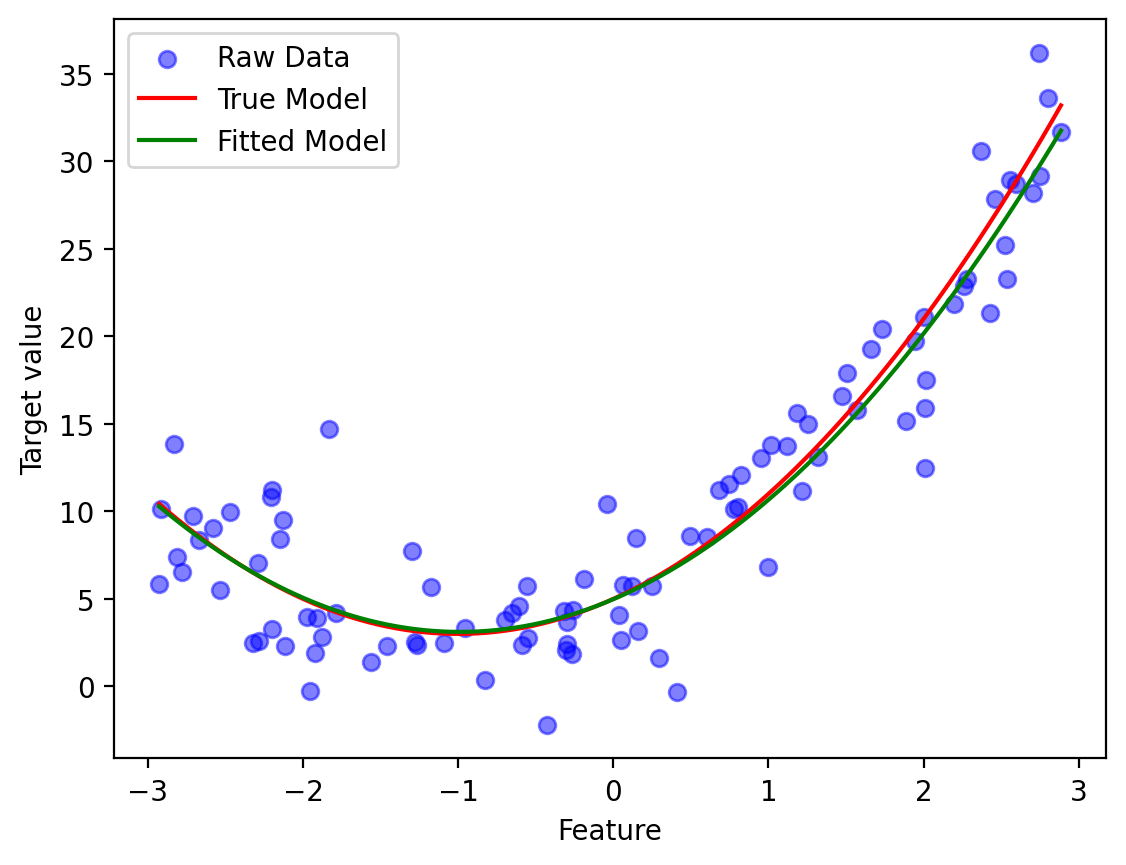

In [24]:
coefs = best_model.named_steps['lin_reg'].coef_
print(coefs)

x = np.linspace(X.min(), X.max(), 100)
y1 = TrueModel(x)
y2 = best_model.predict(x.reshape(-1, 1))

fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', alpha=0.5, label='Raw Data')
ax.plot(x, y1, color='red', label='True Model')
ax.plot(x, y2, color='green', label='Fitted Model')
ax.legend()
ax.set_xlabel('Feature')
ax.set_ylabel('Target value')
plt.show()

# Continued Task by Gemini
Evaluate the performance of the `best_model` on the test set by predicting `y_pred` for `X_test`, calculating the Mean Squared Error (MSE), and visualizing the predictions against the true values `y_test` with appropriate labels and title. Finally, summarize the validation results and discuss the model's generalization performance.

## Predict on Test Set

### Subtask:
使用优化后的最佳模型（`best_model`）对测试集 `X_test` 进行预测，得到预测值 `y_pred`。


**Reasoning**:
The subtask is to predict target values for the `X_test` dataset using the `best_model` and store the predictions in `y_pred`. I will use the `predict` method of the `best_model` for this.



In [25]:
y_pred = best_model.predict(X_test)
print(y_pred)

[ 5.45285663  3.71679383  9.36876679  4.32976024  3.18328289 16.5080955
  8.75646404  6.34949077 26.69182537  3.41993509 14.69199931  3.33258517
 20.32254067  9.22539428 29.70404998  9.46788636 22.5051909   3.97986066
  6.32796684  5.57106757]


## Evaluate Model Performance on Test Set

### Subtask:
计算模型在测试集上的性能指标，例如均方误差 (Mean Squared Error, MSE)，以评估模型的泛化能力。这将直接对应我们之前优化的 `neg_mean_squared_error` 指标。


**Reasoning**:
To evaluate the model's performance on the test set, I need to calculate the Mean Squared Error (MSE) between the true values `y_test` and the predicted values `y_pred`. I will import `mean_squared_error` from `sklearn.metrics` and then compute and print the MSE.



In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 7.181430838222147


## Visualize Predictions on Test Set

### Subtask:
可视化模型在测试集 `X_test` 上的预测值 `y_pred` 与真实值 `y_test` 的对比情况。这有助于直观地评估模型的拟合程度和泛化能力。

#### Instructions
1. Create a scatter plot of `X_test` vs `y_test` (true values).
2. Overlay a scatter plot of `X_test` vs `y_pred` (predicted values) on the same axes.
3. Add appropriate labels for the x and y axes, a legend, and a title to the plot.
4. Display the plot.

**Reasoning**:
To visualize the model's performance, I will create a scatter plot comparing the true values (`y_test`) with the predicted values (`y_pred`) on the test set (`X_test`), and add appropriate labels, a legend, and a title for clarity.



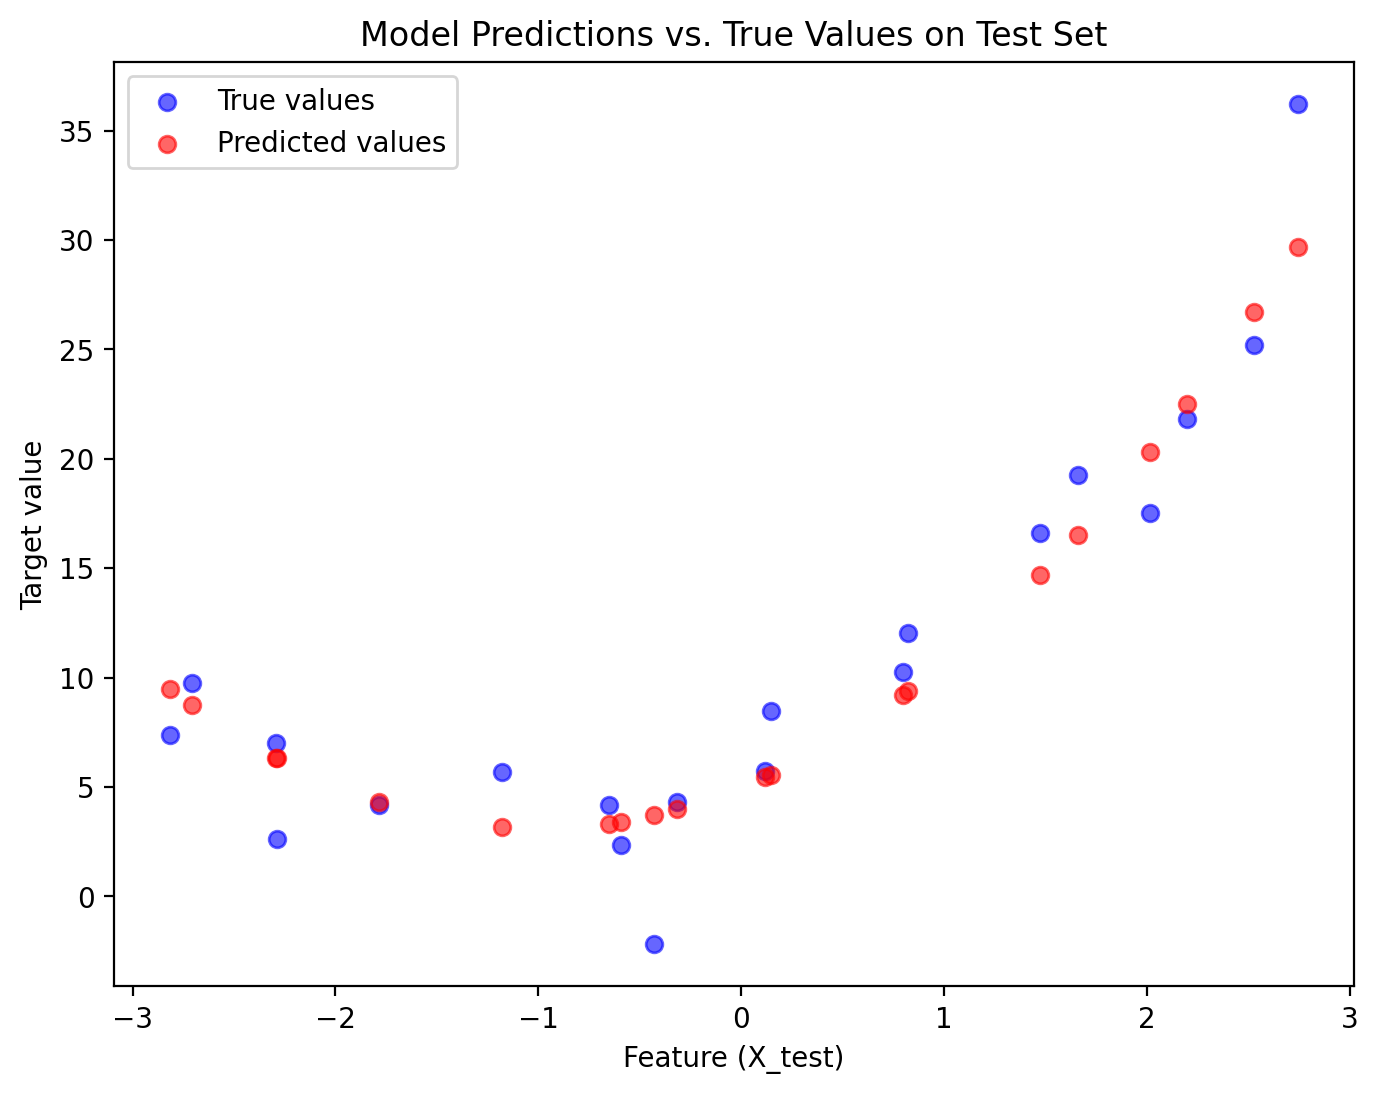

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test, y_test, color='blue', alpha=0.6, label='True values')
ax.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted values')
ax.set_xlabel('Feature (X_test)')
ax.set_ylabel('Target value')
ax.set_title('Model Predictions vs. True Values on Test Set')
ax.legend()
plt.show()

## Summary of Validation Results and Generalization Performance

After optimizing the model using GridSearchCV on the training set, the best model (a polynomial regression with degree 2) was evaluated on the unseen test set.

### Validation Results:
*   **Mean Squared Error (MSE) on Test Set:** 7.181430838222147

### Generalization Performance Discussion:

The calculated Mean Squared Error of approximately 7.18 on the test set indicates a good fit, consistent with the `best_score_` of -10.239 (corresponding to an MSE of ~10.24) from the cross-validation on the training set. The slight difference in MSE between the cross-validation score and the test set score is expected due to variations in data splits.

The visualization clearly shows that the model's predictions (`y_pred`, red points) closely follow the true values (`y_test`, blue points) on the test set. This visual agreement, combined with the relatively low MSE, suggests that the model has generalized well to new, unseen data, effectively capturing the underlying relationship between the feature and the target variable without significant overfitting. The model appears robust and capable of making accurate predictions on data outside of its training set.

## Final Task

### Subtask:
Summarize the validation results and discuss the model's generalization performance.


## Summary:

### Q&A
The model's validation results show a Mean Squared Error (MSE) of approximately 7.18 on the test set. This performance is consistent with the cross-validation score of approximately 10.24 (derived from a `neg_mean_squared_error` of -10.239) observed during training.

The model demonstrates good generalization performance. The relatively low MSE on the unseen test set and the visual alignment between predicted and true values indicate that the model effectively captured the underlying data patterns without significant overfitting. It appears robust and capable of making accurate predictions on new data.

### Data Analysis Key Findings
*   The optimized `best_model` successfully generated predictions (`y_pred`) for the `X_test` dataset.
*   The Mean Squared Error (MSE) on the test set was calculated to be approximately 7.181.
*   A visualization comparing the predicted values against the true values on the test set showed a close alignment, indicating the model's predictions closely follow the actual data.
*   The test set MSE of approximately 7.18 is consistent with the cross-validation MSE of approximately 10.24 (from `neg_mean_squared_error` of -10.239) observed during model optimization.

### Insights or Next Steps
*   The model (a polynomial regression of degree 2) has successfully generalized to unseen data, demonstrating robustness and a good balance between bias and variance, as evidenced by the consistent MSE values across cross-validation and the test set.
*   Further analysis could involve investigating individual prediction errors to identify any specific data points or regions where the model performs less accurately, potentially leading to targeted feature engineering or model refinement.
